In [1]:
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mplplt
import numpy as np
import pyemma

import pyemma.coordinates as coor
import pyemma.plots as mplt
%pylab inline
%matplotlib inline

import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mplplt
import numpy as np
import pyemma

import pyemma.coordinates as coor
import pyemma.plots as mplt
%pylab inline
%matplotlib inline

import scipy.stats as stats
import math

import MDAnalysis as mda
from MDAnalysis.analysis import rdf

# Plots setup 
from matplotlib import rc
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans", 
    "font.serif": ["computer modern roman"],
    "font.size": 16})
plw = 0.6
pcs = 3
pms = 3
bfillc = [0.9,0.9,0.9]
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (5,4)

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [2]:
colvar_intra_FUS = np.loadtxt("./colvar_intra")
print(colvar_intra_FUS.shape)
colvar_inter_FUS = np.loadtxt("./colvar_inter")
print(colvar_inter_FUS.shape)

(101, 269)
(101, 269)


In [3]:
scatter_data_FUS = np.zeros(((len(colvar_inter_FUS.T)-1),len(colvar_inter_FUS),2),dtype='float')
print(scatter_data_FUS.shape)
#####################################################
for i in range(len(colvar_inter_FUS.T)-1):
    for j in range(len(colvar_inter_FUS)):       
        scatter_data_FUS[i][j][0]=colvar_inter_FUS.T[i+1][j]
        scatter_data_FUS[i][j][1]=colvar_intra_FUS.T[i+1][j]
myfile = open('scatter_FUS.txt', 'w')
for i in range(len(colvar_inter_FUS.T)-1):
    for j in range(len(colvar_inter_FUS)):
        myfile.write("%lf %lf \n" % (scatter_data_FUS[i][j][0],scatter_data_FUS[i][j][1]))
myfile.close()

(268, 101, 2)


In [4]:
np.save("scatter_data_FUS.npy",scatter_data_FUS)

In [5]:
scatter_FUS = np.loadtxt("./scatter_FUS.txt")
print(scatter_FUS.shape)

(27068, 2)


/tmp/ipykernel_27543/202963733.py:26: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("nipy_spectral").copy()
  misc['cbar'].cmap.set_over(color='white')


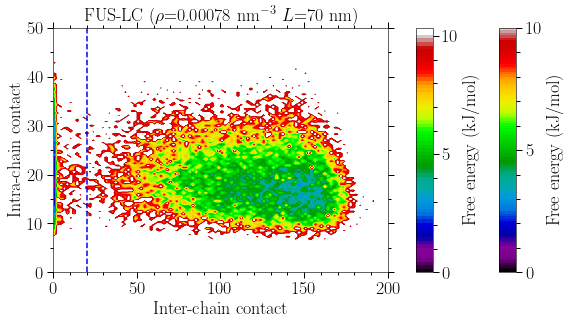

In [22]:
from matplotlib.lines import Line2D
from matplotlib.ticker import AutoMinorLocator

fig = plt.figure(figsize=(16, 12))
gw = int(np.floor(0.5 + 1000 * fig.get_figwidth()))
gh = int(np.floor(0.5 + 1000 * fig.get_figheight()))
gs = plt.GridSpec(gh, gw)
gs.update(hspace=0.0, wspace=0.0)

axes300 = fig.add_subplot(gs[6500:11000,1000:7000])
axes303 = fig.add_subplot(gs[6500:11000,7500:7800])
axes000 = fig.add_subplot(gs[6500:11000,9000:9300])

_, _, misc=pyemma.plots.plot_free_energy(scatter_FUS.T[0],
                                         scatter_FUS.T[1],
                          offset=-1,ax=axes300,kT = 2.49,
                          vmin=0,vmax=10,cax=axes303,
                          avoid_zero_count=True,
                          nbins=100,levels=100,
                          minener_zero=True,
                          cmap='nipy_spectral',
                          cbar_label='Free energy (kJ/mol)',legacy=False,cbar=True,extend='neither')
misc['cbar'].set_label('Free energy (kJ/mol)', rotation=-270,fontsize=18)
misc['cbar'].set_ticks(np.arange(0,11,5))
misc['cbar'].minorticks_on()
misc['cbar'].cmap.set_over(color='white')

cmap = mpl.cm.nipy_spectral
bounds = np.arange(0,10.1,0.1).tolist()
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb2 = mpl.colorbar.ColorbarBase(axes000, cmap=cmap,norm=norm,orientation='vertical')
cb2.set_ticks(np.arange(0,11,5))
cb2.ax.set_ylabel('Free energy (kJ/mol)',fontsize=18)
axes000.yaxis.set_minor_locator(AutoMinorLocator(5))
cb2.ax.tick_params(direction='out', which='major',length=6, width=1.0, labelsize=18)
cb2.ax.tick_params(direction='out', which='minor',length=4, width=1.0, labelsize=18)

axes303.tick_params(direction='out', which='major',length=6, width=1.0, labelsize=18)
axes303.tick_params(direction='out', which='minor',length=4, width=1.0, labelsize=18)
axes300.set_xlabel(r'Inter-chain contact',fontsize =18)
axes300.set_ylabel(r'Intra-chain contact',fontsize =18)
axes300.set_title(r'FUS-LC ($\rho$=0.00078 nm$^{-3}$ $L$=70 nm)',fontsize =18)
axes300.tick_params(direction='out', which='major', length=6, width=1.0, labelsize=18)
axes300.tick_params(direction='out', which='minor', length=3, width=1.0, labelsize=18)
axes300.set_ylim(0,50)
axes300.set_xlim(0,200)
axes300.yaxis.set_minor_locator(AutoMinorLocator(2))
axes300.tick_params(direction='out', which='major', length=6, width=1.0, labelsize=18)
axes300.tick_params(direction='out', which='minor', length=3, width=1.0, labelsize=18)
axes300.axvline(x=20,linestyle='--',color='blue')
#fig.savefig('new_1_FUS.png', dpi=600, bbox_inches='tight')

In [7]:
#this is fixed for using all the trajectory
N_threshold=20

In [8]:
N_steps_FUS = len(colvar_intra_FUS)
print(N_steps_FUS)
N_chains_FUS = len(colvar_intra_FUS.T)-1
print(N_chains_FUS)

N_cluster_FUS = np.zeros((N_steps_FUS),dtype='float')
N_cluster_FUS.shape

N_cluster_FUS_id = np.zeros((N_steps_FUS,N_chains_FUS),dtype='float')
N_cluster_FUS_id.shape

for i in range(N_steps_FUS):
    count = 0 
    for j in range(N_chains_FUS):
        if colvar_inter_FUS[i][j+1] >= N_threshold: 
            count = count + 1
            N_cluster_FUS_id[i][j]=1
        N_cluster_FUS[i] = count 

101
268


(101,)


Text(0.5, 1.0, '1D clustersize distribution')

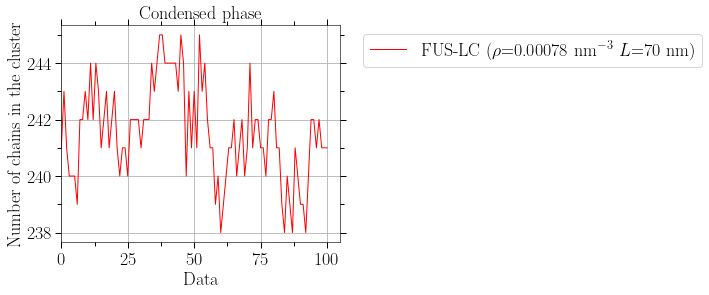

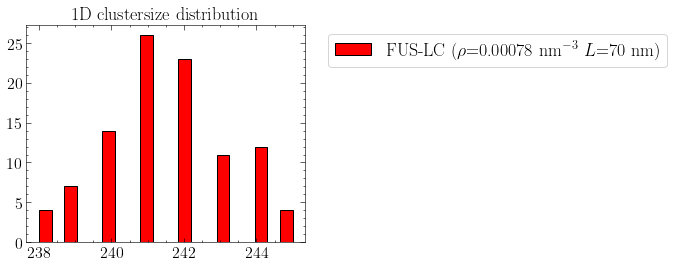

In [9]:
from matplotlib.lines import Line2D
from matplotlib.ticker import AutoMinorLocator

fig, axes = plt.subplots(figsize=(5, 4))
axes.plot(N_cluster_FUS,label = r'FUS-LC ($\rho$=0.00078 nm$^{-3}$ $L$=70 nm)',color = 'red',linewidth=1)
#axes.set_ylim(20,)

axes.tick_params(direction='out', which='major', length=6, width=1, labelsize=18)
axes.tick_params(direction='out', which='minor', length=4, width=1, labelsize=18)
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
#axes.axvline(x=10000,linestyle='--',color='blue')

axes.grid()
axes.set_xlim(0)
axes.set_xlabel('Data',fontsize=18)
axes.set_ylabel('Number of chains in the cluster',fontsize=18)
lgd=axes.legend(bbox_to_anchor=(1.05, 1),loc='upper left', fontsize=18,frameon=True)
axes.set_title("Condensed phase", fontsize=18)
#######################################################
print(N_cluster_FUS.shape)
l =[N_cluster_FUS[0:]]
combined_list=[]
for x in l:
    combined_list.extend(x) 
average(combined_list)
test=combined_list

fig, axes = plt.subplots(figsize=(5, 4))
axes.hist(test,histtype='bar', ec='black',bins=20,label=r'FUS-LC ($\rho$=0.00078 nm$^{-3}$ $L$=70 nm)',color = 'red')
lgd=axes.legend(bbox_to_anchor=(1.05, 1),loc='upper left', fontsize=18,frameon=True)
axes.set_title("1D clustersize distribution", fontsize=18)

In [10]:
N_threshold_shift=N_threshold*3


N_cluster_FUS_id_shift = np.zeros((N_steps_FUS,N_chains_FUS),dtype='float')
N_cluster_FUS_id_shift.shape

N_cluster_FUS_shift = np.zeros((N_steps_FUS),dtype='float')
N_cluster_FUS_shift.shape

for i in range(N_steps_FUS):
    count = 0 
    for j in range(N_chains_FUS):
        if colvar_inter_FUS[i][j+1] >= N_threshold_shift: 
            count = count + 1
            N_cluster_FUS_id_shift[i][j]=1
        N_cluster_FUS_shift[i]=count 

Shift the COM trajectory to box center

In [11]:
def read(data):
    "read-in original xyz data"
    with md.formats.XYZTrajectoryFile(data) as f:
        xyz = f.read()
    return(xyz)
###########################
#Nloops=20
#distance_threshold=50
#distance_count=5
###########################
def shift(xyz,L,Nstep,Nchain,colvar_inter,N_cluster_shift):        
    
    "find the droplet-com and the last-frame droplet xyz"    
    com_xyz=np.zeros((Nstep,3),dtype='float')
    for i in range(Nstep): 
        cluster_xyz=np.zeros((int(N_cluster_shift[i]),3),dtype="float")
        count_cluster=0
        for j in range(Nchain):
            if colvar_inter[i][j+1] >= N_threshold_shift: 
                cluster_xyz[count_cluster][:]=xyz[i][j][:]
                count_cluster+=1
        com_xyz[i][0]=np.mean(cluster_xyz.T[0])
        com_xyz[i][1]=np.mean(cluster_xyz.T[1])
        com_xyz[i][2]=np.mean(cluster_xyz.T[2])
                    
    "move and wrap the system by centering the box at the droplet-com"
    xyz_shift=np.zeros((Nstep,Nchain,3),dtype="float")
    dist=np.zeros((Nstep,Nchain,3),dtype="float")
    for i in range(Nstep): 
        for j in range(Nchain):
            for k in range(3):
                dist[i][j][k]=xyz[i,j,k]-com_xyz[i][k]                
                if dist[i,j,k]<-L*0.5:
                    xyz_shift[i][j][k]=xyz[i][j][k]+L
                elif dist[i,j,k]>L*0.5:
                    xyz_shift[i][j][k]=xyz[i][j][k]-L
                else:
                    xyz_shift[i][j][k]=xyz[i][j][k]                                  
            
    "find the new droplet-com" "more like a double-check"
    com_xyz_shift=np.zeros((Nstep,3),dtype='float')
    for i in range(Nstep): 
        cluster_xyz=np.zeros((int(N_cluster_shift[i]),3),dtype="float")
        count_cluster=0
        for j in range(Nchain):
            if colvar_inter[i][j+1] >= N_threshold_shift: 
                cluster_xyz[count_cluster][:]=xyz_shift[i][j][:]
                count_cluster+=1
        com_xyz_shift[i][0]=np.mean(cluster_xyz.T[0])
        com_xyz_shift[i][1]=np.mean(cluster_xyz.T[1])
        com_xyz_shift[i][2]=np.mean(cluster_xyz.T[2])
        
    return(xyz,xyz_shift,com_xyz,com_xyz_shift)
#########################################################################
def function_check(xyz,com_xyz,L,Nstep,Nchain,colvar_inter,N_cluster_shift,distance_threshold,distance_count):
    "check if the wrapped system is cut through pbc after wrapping" 
    xyz_shift_check=np.zeros((Nstep,Nchain,3),dtype="float")
    
    "compute atom-origin in all xyz axis"
    #count_dist=np.zeros(Nstep,dtype='float')
    for i in range(Nstep): 
        for k in range(3):
            count_dist=0
            for j in range(Nchain):
                if colvar_inter[i][j+1] >= N_threshold_shift:
                    if abs(xyz[i,j,k])<=distance_threshold:
                        count_dist+=1
                    else:
                        pass
                else:
                    pass
            if count_dist<=distance_count: #droplet cut across pbc along this axis without sufficient cn in origin
                for j in range(Nchain):
                    if xyz[i][j][k]<0:
                        xyz_shift_check[i][j][k]=xyz[i][j][k]+L*0.5
                    elif xyz[i][j][k]>0:
                        xyz_shift_check[i][j][k]=xyz[i][j][k]-L*0.5
                    else:
                        xyz_shift_check[i][j][k]=xyz[i][j][k]
            else:
                for j in range(Nchain):
                    xyz_shift_check[i][j][k]=xyz[i][j][k]
                
    com_xyz_shift_check=np.zeros((Nstep,3),dtype='float')
    for i in range(Nstep): 
        cluster_xyz=np.zeros((int(N_cluster_shift[i]),3),dtype="float")
        count_cluster=0
        for j in range(Nchain):
            if colvar_inter[i][j+1] >= N_threshold_shift: 
                cluster_xyz[count_cluster][:]=xyz_shift_check[i][j][:]
                count_cluster+=1
        com_xyz_shift_check[i][0]=np.mean(cluster_xyz.T[0])
        com_xyz_shift_check[i][1]=np.mean(cluster_xyz.T[1])
        com_xyz_shift_check[i][2]=np.mean(cluster_xyz.T[2])
    com_xyz_shift_check=com_xyz
    
    return(xyz_shift_check,com_xyz_shift_check)
###########################################################################
def function4(data,L,Nstep,Nchain,Nloops,colvar_inter,N_cluster_shift,distance_threshold,distance_count):
    input=read(data)
    a,a_shift,b,b_shift=shift(input,L,Nstep,Nchain,colvar_inter,N_cluster_shift)
    print("round %d"%0)
    
    "build a complete droplet"
    for i in range(Nloops):
        check=0
        for p in range(len(b)):
            for k in range(3):
                if b[p][k]==b_shift[p][k]:
                    check+=1
        if check==len(b)*len(b.T):
            print("check=%d converged at %d"%(check,i))
            break
        else:
            print("check=%d not converged at %d"%(check,i))
            x=a_shift
            a,a_shift,b,b_shift=shift(x,L,Nstep,Nchain,colvar_inter,N_cluster_shift) 
    "finish building a complete droplet"
    
    
    "write out the final xyz center droplet-com at origin"
    xyz_origin=np.zeros((Nstep,Nchain,3),dtype="float")
    for i in range(Nstep): 
        for j in range(Nchain):
            for k in range(3):
                xyz_origin[i][j][k]=a_shift[i][j][k]-b_shift[i][k]
    
    dist=np.zeros((Nstep,Nchain,3),dtype="float")
    xyz_origin_shift=np.zeros((Nstep,Nchain,3),dtype="float")    
    for i in range(Nstep): 
        for j in range(Nchain):
            for k in range(3):
                dist[i][j][k]=xyz_origin[i,j,k]               
                if dist[i,j,k]<-L*0.5:
                    xyz_origin_shift[i][j][k]=xyz_origin[i][j][k]+L
                elif dist[i,j,k]>L*0.5:
                    xyz_origin_shift[i][j][k]=xyz_origin[i][j][k]-L
                else:
                    xyz_origin_shift[i][j][k]=xyz_origin[i][j][k]
    
    "write out the final xyz center droplet-com at origin"
    com_xyz_shift=np.zeros((Nstep,3),dtype='float')
    for i in range(Nstep): 
        cluster_xyz=np.zeros((int(N_cluster_shift[i]),3),dtype="float")
        count_cluster=0
        for j in range(Nchain):
            if colvar_inter[i][j+1] >= N_threshold_shift: 
                cluster_xyz[count_cluster][:]=xyz_origin_shift[i][j][:]
                count_cluster+=1
        com_xyz_shift[i][0]=np.mean(cluster_xyz.T[0])
        com_xyz_shift[i][1]=np.mean(cluster_xyz.T[1])
        com_xyz_shift[i][2]=np.mean(cluster_xyz.T[2])
    
    "final check"
    xyz_shift_check,com_xyz_shift_check=function_check(xyz_origin_shift,com_xyz_shift,L,Nstep,Nchain,colvar_inter,N_cluster_shift,distance_threshold,distance_count)
    
    return(xyz_origin_shift,com_xyz_shift,xyz_shift_check,com_xyz_shift_check)

In [12]:
Nloops=20

In [13]:
xyz_origin_shift,com_origin_shift,xyz_shift_check,com_xyz_shift_check=function4('./COM_traj.xyz',700,N_steps_FUS,N_chains_FUS,Nloops,colvar_inter_FUS,N_cluster_FUS_shift,50,20)

myfile = open('./COM_shift/COM_original_final_def2.xyz', 'w')
for i in range(N_steps_FUS): 
    myfile.write("%d\n\n" % N_chains_FUS)
    for j in range(N_chains_FUS):
        myfile.write("X %lf %lf %lf\n" % (xyz_shift_check[i][j][0],xyz_shift_check[i][j][1],xyz_shift_check[i][j][2]))
myfile.close()

myfile = open('./COM_shift/COM_com_original_final_def2.xyz', 'w')
for i in range(N_steps_FUS): 
    myfile.write("%d\n\n" % 1)
    myfile.write("X %lf %lf %lf\n" % (com_xyz_shift_check[i][0],com_xyz_shift_check[i][1],com_xyz_shift_check[i][2]))
myfile.close()

myfile = open('./COM_shift/COM_original_final_def2_color.xyz', 'w')
for i in range(N_steps_FUS): 
    myfile.write("%d\n\n" % N_chains_FUS)
    for j in range(N_chains_FUS):
        myfile.write("X %lf %lf %lf %d\n" % (xyz_shift_check[i][j][0],xyz_shift_check[i][j][1],xyz_shift_check[i][j][2],N_cluster_FUS_id_shift[i][j]))
myfile.close()

round 0
check=0 not converged at 0
check=303 converged at 1


In [14]:
xyz=read('./COM_shift/COM_original_final_def2.xyz')
dist=np.zeros((N_chains_FUS,N_steps_FUS),dtype='float')
print(dist.shape)
for i in range(N_chains_FUS):
    for j in range(N_steps_FUS):
        dist[i][j]=xyz[j][i][0]*xyz[j][i][0]+xyz[j][i][1]*xyz[j][i][1]+xyz[j][i][2]*xyz[j][i][2]
        dist[i][j]=np.sqrt(dist[i][j])

myfile = open('./dist_scatter_com_FUS.txt', 'w')
for i in range(N_chains_FUS):
    for j in range(N_steps_FUS):
        myfile.write("%lf\n" % (dist[i][j]*0.1))
myfile.close()

distance=np.loadtxt('./dist_scatter_com_FUS.txt')
distance.shape

(268, 101)


(27068,)

/tmp/ipykernel_27543/1618893283.py:35: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("PiYG_r").copy()
  misc['cbar'].cmap.set_over(color='white')


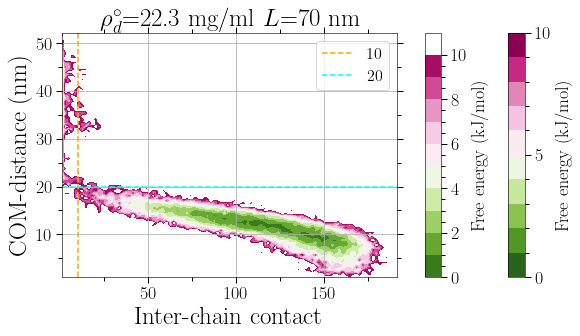

In [21]:
######################################################################################
######################################################################################
fig = plt.figure(figsize=(16, 14))
gw = int(np.floor(0.5 + 1000 * fig.get_figwidth()))
gh = int(np.floor(0.5 + 1000 * fig.get_figheight()))
gs = plt.GridSpec(gh, gw)
gs.update(hspace=0.0, wspace=0.0)

axes300 = fig.add_subplot(gs[6500:11000,1000:7000])
axes303 = fig.add_subplot(gs[6500:11000,7500:7800])
axes000 = fig.add_subplot(gs[6500:11000,9000:9300])

_, _, misc=pyemma.plots.plot_free_energy(
                          scatter_FUS.T[0],
                          distance*1,
                          offset=-1,                 
                          ax=axes300,
                          kT = 2.49,
                          vmin=0,
                          vmax=10,
                          cax=axes303,
                          avoid_zero_count=True,
                          nbins=100,
                          #ncontours=20,
                          levels=10,
                          minener_zero=True,
                          cmap='PiYG_r',
                          cbar_label='Free energy (kJ/mol)',
                          legacy=False,
                          cbar=True,
                          extend='neither')

misc['cbar'].set_label('Free energy (kJ/mol)', rotation=-270,fontsize=18)
misc['cbar'].set_ticks(np.arange(0,13,2))
misc['cbar'].cmap.set_over(color='white')
axes303.tick_params(direction='out', which='major',length=6, width=1.0, labelsize=18)
axes303.tick_params(direction='out', which='minor',length=4, width=1.0, labelsize=18)

axes300.grid()
axes300.xaxis.set_minor_locator(AutoMinorLocator(2))
axes300.yaxis.set_minor_locator(AutoMinorLocator(2))
axes300.tick_params(direction='out', which='major',length=6, width=1.0, labelsize=18)
axes300.tick_params(direction='out', which='minor',length=4, width=1.0, labelsize=18)
#axes300.axvline(x=N_threshold,linestyle='--',color='blue',label="%.0lf" % (N_threshold))

N_threshold_2 = 10
axes300.axvline(x=N_threshold_2,linestyle='--',color='orange',label="%.0lf" % (N_threshold_2))
N_threshold_3 = 200
axes300.axhline(y=N_threshold_3*0.1,linestyle='--',color='cyan',label="%.0lf" % (N_threshold_3*0.1))

axes300.set_ylabel("COM-distance (nm)",fontsize=25)
axes300.set_xlabel("Inter-chain contact",fontsize=25)
axes300.set_title(r"${\rho_d^\circ}$=22.3 mg/ml $L$=70 nm",fontsize=25)

cmap = mpl.cm.PiYG_r
bounds = np.arange(0,11,1).tolist()
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb2 = mpl.colorbar.ColorbarBase(axes000, cmap=cmap,norm=norm,orientation='vertical')
cb2.set_ticks(np.arange(0,11,5))
cb2.ax.set_ylabel('Free energy (kJ/mol)',fontsize=18)
axes000.yaxis.set_minor_locator(AutoMinorLocator(5))
cb2.ax.tick_params(direction='out', which='major',length=6, width=1.0, labelsize=18)
cb2.ax.tick_params(direction='out', which='minor',length=4, width=1.0, labelsize=18)
axes300.legend()
fig.savefig('FUS_FES.png', dpi=600, bbox_inches='tight')

In [16]:
print(N_threshold_2)
print(N_threshold_3)

10
200


In [17]:
identity = np.zeros((N_chains_FUS,N_steps_FUS),dtype="float")
for i in range(N_chains_FUS):
    for j in range(N_steps_FUS):
        if dist[i][j]<= N_threshold_3 and scatter_data_FUS.T[0].T[i][j]>= N_threshold_2:
            identity[i][j]=1
        else:
            pass

clustersize_FUS = np.zeros((N_steps_FUS),dtype="float")
for i in range(N_steps_FUS):
    clustersize_FUS[i]=np.sum(identity.T[i])


myfile = open('./COM_shift/COM_original_final_def3_color.xyz', 'w')
for i in range(N_steps_FUS): 
    myfile.write("%d\n\n" % N_chains_FUS)
    for j in range(N_chains_FUS):
        myfile.write("X %lf %lf %lf %d\n" % (xyz_shift_check[i][j][0],xyz_shift_check[i][j][1],xyz_shift_check[i][j][2],identity.T[i][j]+2))
myfile.close()

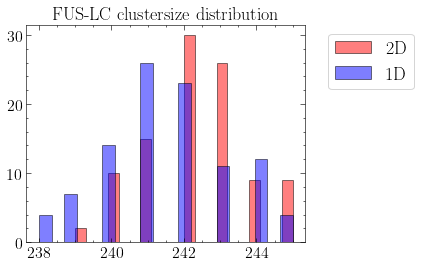

In [18]:
plt.hist(clustersize_FUS,histtype='bar', ec='black',bins=20,label="2D",
         color = 'red',alpha=0.5)
plt.hist(test,histtype='bar', ec='black',bins=20,label = "1D",color = 'blue',alpha=0.5)
plt.title(r"FUS-LC clustersize distribution", fontsize=18)
lgd=plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', fontsize=18,frameon=True)

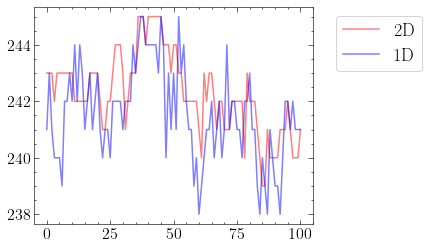

In [19]:
plt.plot(clustersize_FUS,label="2D",color = 'red',alpha=0.5)
plt.plot(test,label = "1D",color = 'blue',alpha=0.5)
lgd=plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', fontsize=18,frameon=True)

data for MSM analysis (sample data is not long enough)

In [20]:
for i in range(N_chains_FUS):
    myfile = open('./MSM_short_example/sample_%d.txt' % i, 'w')
    myfile.write("# time identity distance inter intra\n")
    for j in range(N_steps_FUS):
        myfile.write("%d %d %lf %lf %lf\n" % (j,identity[i][j],dist[i][j],
                                             scatter_data_FUS.T[0].T[i][j],
                                              scatter_data_FUS.T[1].T[i][j]))
    myfile.close()